# 1. Import libraries and Load dataset

## 1.1. Import libraries

In [1]:
!pip3 install xgboost

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sb
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1.2. Load Dataset

In [3]:
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## 1.3. Basic EDA

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


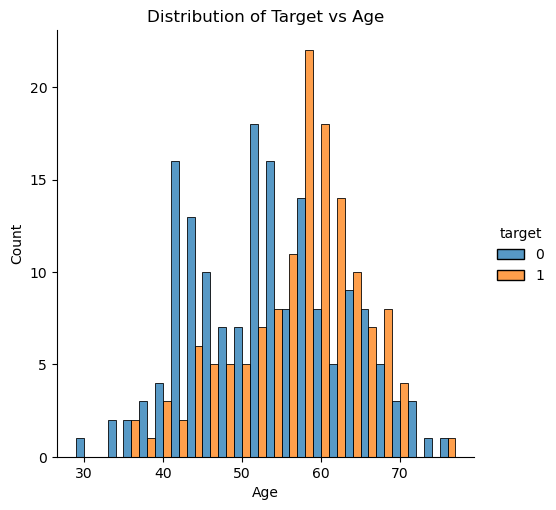

In [4]:
# distribution of target vs age

sb.displot(df, x= "age", hue ="target", multiple="dodge", binwidth=2)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title ("Distribution of Target vs Age")
plt.show()

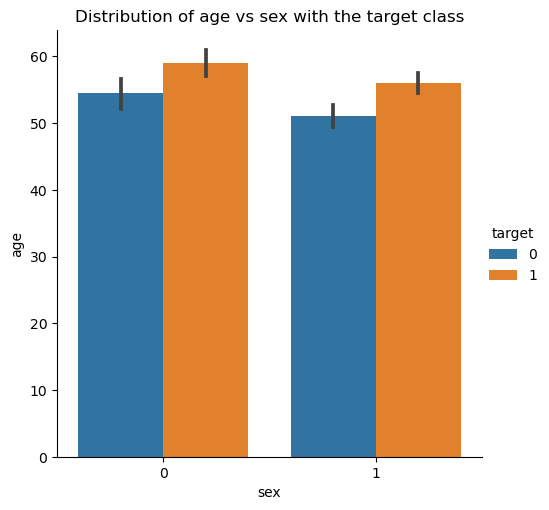

In [5]:
# barplot of age vs sex with hue = target

sb.catplot(kind= 'bar', data=df,  y='age', x= 'sex', hue='target')
plt.title("Distribution of age vs sex with the target class")

plt.show()

# 2. Models

## 2.1. Data splitting and normalizing

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Train test split


sc = ss() # Standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 2.2. K-Neighbors classifier

### A. Model training

In [51]:
# Model training
kNN_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
kNN_classifier.fit (X_train, y_train)

# Prediction on train and test set
kNN_preds =kNN_classifier.predict(X_test) # Test set prediction
cm_test = confusion_matrix(kNN_preds, y_test)
 
kNN_preds_train =kNN_classifier.predict(X_train) # Train set prediction
cm_train = confusion_matrix(kNN_preds_train, y_train)


### B. Model Evaluation

In [52]:
print ("Evaluation results on train set")
print(classification_report(y_train, kNN_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       135
           1       0.89      0.85      0.87       107

    accuracy                           0.89       242
   macro avg       0.89      0.88      0.89       242
weighted avg       0.89      0.89      0.89       242



In [53]:
print ("Evaluation results on test set")
print(classification_report(y_test, kNN_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
#########################################   SVM   #############################################################

#Bai Tap 4

#.         Your code here ******************


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))



Accuracy for training set for KNeighborsClassifier = 0.66
Accuracy for test set for KNeighborsClassifier = 0.67


## 2.3. Naive Bayes

### A. Model training

In [55]:
# Model training
NB_classifier = GaussianNB()
NB_classifier.fit (X_train, y_train)

# Prediction on train and test set
NB_preds = NB_classifier.predict(X_test) # Test set prediction
cm_test_NB = confusion_matrix(NB_preds, y_test)
 
NB_preds_train =NB_classifier.predict(X_train) # Train set prediction
cm_train_NB = confusion_matrix(NB_preds_train, y_train)


### B. Model evaluation

In [56]:
print ("Evaluation results on train set")
print(classification_report(y_train, NB_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       135
           1       0.86      0.78      0.82       107

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242



In [57]:
print ("Evaluation results on test set")
print(classification_report(y_test, NB_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## 2.4. Decision Tree

### A. Model training

In [7]:
# Model training
DecTree_classifier = DecisionTreeClassifier()
DecTree_classifier.fit (X_train, y_train)

# Prediction on train and test set
DT_preds = DecTree_classifier.predict(X_test) # Test set prediction
cm_test_DT = confusion_matrix(DT_preds, y_test)
 
DT_preds_train =DecTree_classifier.predict(X_train) # Train set prediction
cm_train_DT = confusion_matrix(DT_preds_train, y_train)


### B. Evaluation

In [8]:
print ("Evaluation results on train set")
print(classification_report(y_train, DT_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       107

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [9]:
print ("Evaluation results on test set")
print(classification_report(y_test, DT_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## 2.5. Random Forest

### A. Model training

In [12]:
# Model training
RF_classifier = RandomForestClassifier(criterion= 'gini', max_depth= 10, min_samples_split=2, n_estimators= 10, random_state= 42)
RF_classifier.fit (X_train, y_train)

# Prediction on train and test set
RF_preds = RF_classifier.predict(X_test) # Test set prediction
cm_test_RF = confusion_matrix(RF_preds, y_test)
 
RF_preds_train =RF_classifier.predict(X_train) # Train set prediction
cm_train_RF = confusion_matrix(RF_preds_train, y_train)

### B. Evaluation

In [14]:
print ("Evaluation results on train set")
print(classification_report(y_train, RF_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.98      0.98      0.98       107

    accuracy                           0.98       242
   macro avg       0.98      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242



In [16]:
print ("Evaluation results on test set")
print(classification_report(y_test, RF_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



## 2.6. Adaboost

### A. Model training

In [18]:
# Model training
Ada_classifier = AdaBoostClassifier(n_estimators= 50, learning_rate= 1.0, random_state= 42)
Ada_classifier.fit (X_train, y_train)

# Prediction on train and test set
Ada_preds = Ada_classifier.predict(X_test) # Test set prediction
cm_test_Ada = confusion_matrix(Ada_preds, y_test)
 
Ada_preds_train =Ada_classifier.predict(X_train) # Train set prediction
cm_train_Ada = confusion_matrix(Ada_preds_train, y_train)

### B. Evaluation

In [19]:
print ("Evaluation results on train set")
print(classification_report(y_train, Ada_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       135
           1       0.91      0.89      0.90       107

    accuracy                           0.91       242
   macro avg       0.91      0.91      0.91       242
weighted avg       0.91      0.91      0.91       242



In [20]:
print ("Evaluation results on test set")
print(classification_report(y_test, Ada_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## 2.7. Gradient Boost

### A. Model training

In [22]:
# Model training
GB_classifier = GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1, subsample= 1.0, min_samples_split=2, max_depth=3, random_state= 42)
GB_classifier.fit (X_train, y_train)

# Prediction on train and test set
GB_preds = GB_classifier.predict(X_test) # Test set prediction
cm_test_GB = confusion_matrix(GB_preds, y_test)
 
GB_preds_train =GB_classifier.predict(X_train) # Train set prediction
cm_train_GB = confusion_matrix(GB_preds_train, y_train)

### B. Rvaluation

In [23]:
print ("Evaluation results on train set")
print(classification_report(y_train, GB_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       135
           1       1.00      0.99      1.00       107

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [24]:
print ("Evaluation results on test set")
print(classification_report(y_test, GB_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## 2.8. XG Boost

### A. Model training

In [5]:
XGB_classifier = XGBClassifier (objective='binary:logistic', random_state= 42, n_estimators= 100)
XGB_classifier.fit (X_train, y_train)

# Prediction on train and test set
XGB_preds = XGB_classifier.predict(X_test) # Test set prediction
cm_test_XGB = confusion_matrix(XGB_preds, y_test)
 
XGB_preds_train = XGB_classifier.predict(X_train) # Train set prediction
cm_train_XGB = confusion_matrix(XGB_preds_train, y_train)

### B. Evaluation

In [6]:
print ("Evaluation results on train set")
print(classification_report(y_train, XGB_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       107

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [7]:
print ("Evaluation results on test set")
print(classification_report(y_test, XGB_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

#.         Your code here ******************


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



Accuracy for training set for KNeighborsClassifier = 0.92
Accuracy for test set for KNeighborsClassifier = 0.9


## 2.9. SVM

### A. Model training

In [10]:
SVM_classifier = SVC (kernel= 'rbf', random_state= 42)
SVM_classifier.fit (X_train, y_train)

# Prediction on train and test set
SVM_preds = SVM_classifier.predict(X_test) # Test set prediction
cm_test_SVM = confusion_matrix(SVM_preds, y_test)
 
SVM_preds_train = SVM_classifier.predict(X_train) # Train set prediction
cm_train_SVM = confusion_matrix(SVM_preds_train, y_train)

### B. Evaluation

In [11]:
print ("Evaluation results on train set")
print(classification_report(y_train, SVM_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       135
           1       0.95      0.82      0.88       107

    accuracy                           0.90       242
   macro avg       0.91      0.89      0.90       242
weighted avg       0.91      0.90      0.90       242



In [12]:
print ("Evaluation results on test set")
print(classification_report(y_test, SVM_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## 2.10 Stacking

### A. Model training

In [25]:
dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('svc', svc), ('ad', ad)]
xg = XGBClassifier()
stk_classifier = StackingClassifier (estimators= clf, final_estimator= xg)

stk_classifier.fit (X_train, y_train)

# Prediction on train and test set
stk_preds = stk_classifier.predict(X_test) # Test set prediction
cm_test_stk = confusion_matrix(stk_preds, y_test)
 
stk_preds_train = stk_classifier.predict(X_train) # Train set prediction
cm_train_stk = confusion_matrix(stk_preds_train, y_train)

/Users/macos/anaconda3/lib/python3.10/site-packages/xgboost/core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


### B. Evaluation

In [26]:
print ("Evaluation results on train set")
print(classification_report(y_train, stk_preds_train))

Evaluation results on train set
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       135
           1       0.84      0.85      0.85       107

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [27]:
print ("Evaluation results on test set")
print(classification_report(y_test, stk_preds))

Evaluation results on test set
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

